# Коррекция яркости и цвета

In [1]:
from copy import deepcopy

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
class Shower:
    hist_params = lambda img_mtx, color='black', alpha=0.8: {
        'x': img_mtx.ravel(),   # the 2D array (image) into a 1D array
        'bins': 256,            # how many intervals (or "bins") the data will be divided into for the histogram
        'range': [0, 256],      # the lower and upper limits for the bins
        'color': color,
        'alpha': alpha          # the transparency of the bars in the histogram

    }

    imshow_params = lambda img_mtx: {
        'X': img_mtx,
        'vmin': 0,  # any pixel value less than or equal to this will be mapped to black (0 in grayscale)
        'vmax': 255 # any pixel value greater than or equal to this will be mapped to white (255 in grayscale)
    }

    def show_img(img_mtx: np.ndarray, in_gray: bool=True, is_show: bool=True):
        '''
            cmap='gray': display the image in grayscale
        '''
        
        if in_gray:
            plt.imshow(**Shower.imshow_params(img_mtx), cmap='gray')
        else:
            plt.imshow(**Shower.imshow_params(img_mtx))

        plt.axis('off')

        if is_show:
            plt.show()



    def show_exposure_hist(img_mtx: np.ndarray, is_show: bool=True):
        plt.hist(**Shower.hist_params(img_mtx))
        plt.xlim([0, 256])

        plt.title('Pixel intesities')
        plt.xlabel('pixel intensity')
        plt.ylabel('frequency')

        plt.grid(color='gray', linestyle='--', linewidth=0.2, alpha=0.7)
        
        if is_show:
            plt.show()



    def show_img_and_exposure_hist(img_mtx: np.ndarray, figsize: tuple=(12, 4)):
        plt.figure(figsize=figsize)

        plt.subplot(1, 2, 1)
        Shower.show_img(img_mtx, is_show=False)

        plt.subplot(1, 2, 2)
        Shower.show_exposure_hist(img_mtx, is_show=False)

        plt.tight_layout() # fit into the figure area without overlapping
        plt.show()


    def show_dif_hist(img_mtx1: np.ndarray, img_mtx2: np.ndarray, figsize: tuple=(12, 4)):
        plt.figure(figsize=figsize)

        plt.hist(**Shower.hist_params(img_mtx1, color='blue'), linewidth=1, histtype='step')
        plt.hist(**Shower.hist_params(img_mtx2))

        plt.title('Pixel intesities')
        plt.xlabel('pixel intensity')
        plt.ylabel('frequency')

        plt.grid(color='gray', linestyle='--', linewidth=0.2, alpha=0.7)

        plt.show()


## Простое задание

In [4]:
IMG_PATH = './materials/imgs/palm_wb.png'

### 1. Провести линейную коррекцию контрастности изображения

array([[ 65,  70,  72, ...,  54,  52,  62],
       [ 68,  72,  74, ...,  56,  55,  66],
       [ 71,  75,  76, ...,  59,  58,  69],
       ...,
       [104, 103, 103, ...,  96,  99, 109],
       [112, 108, 106, ...,  86,  88, 102],
       [119, 113, 110, ...,  76,  76,  94]], dtype=uint8)

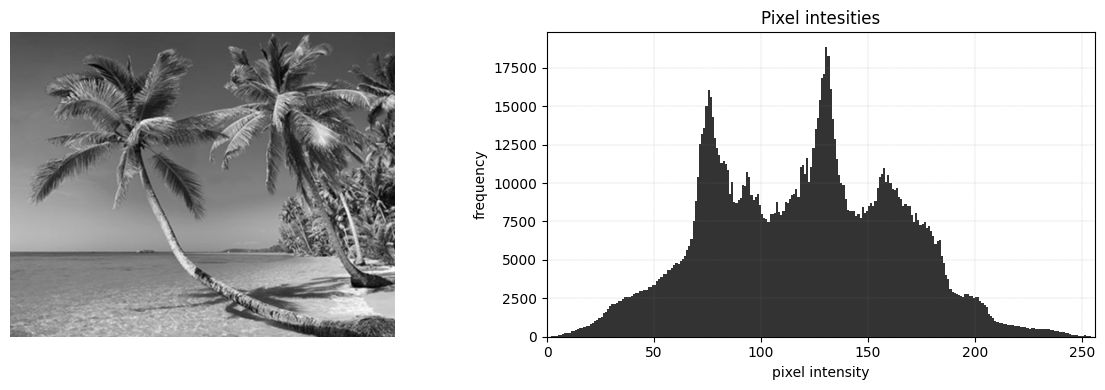

In [5]:
img_grayscale = cv2.imread(
    IMG_PATH, 
    cv2.IMREAD_GRAYSCALE
)

display(img_grayscale)
Shower.show_img_and_exposure_hist(img_grayscale)

array([[32.5, 35. , 36. , ..., 27. , 26. , 31. ],
       [34. , 36. , 37. , ..., 28. , 27.5, 33. ],
       [35.5, 37.5, 38. , ..., 29.5, 29. , 34.5],
       ...,
       [52. , 51.5, 51.5, ..., 48. , 49.5, 54.5],
       [56. , 54. , 53. , ..., 43. , 44. , 51. ],
       [59.5, 56.5, 55. , ..., 38. , 38. , 47. ]])

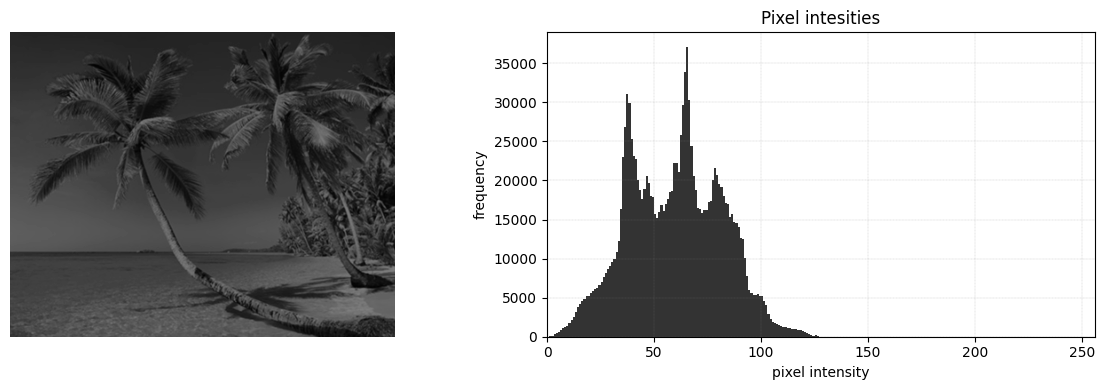

In [6]:
img_low_contrast = img_grayscale / 2

display(img_low_contrast)
Shower.show_img_and_exposure_hist(img_low_contrast)

In [7]:
def linear_contrast_correction(img_mtx: np.ndarray):
    x_min = img_mtx.min()
    x_max = img_mtx.max()
    
    img_corrected = (img_mtx - x_min) * (255 / (x_max))

    return img_corrected

In [8]:
img_corrected = linear_contrast_correction(img_low_contrast)

display(img_corrected)

array([[ 64.,  69.,  71., ...,  53.,  51.,  61.],
       [ 67.,  71.,  73., ...,  55.,  54.,  65.],
       [ 70.,  74.,  75., ...,  58.,  57.,  68.],
       ...,
       [103., 102., 102., ...,  95.,  98., 108.],
       [111., 107., 105., ...,  85.,  87., 101.],
       [118., 112., 109., ...,  75.,  75.,  93.]])

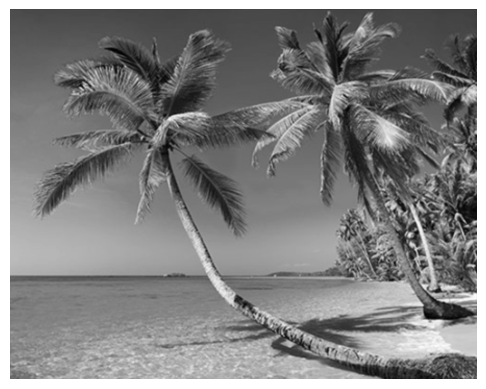

In [9]:
Shower.show_img(img_corrected)

The blue line is the distribution of pixel intesities for default image


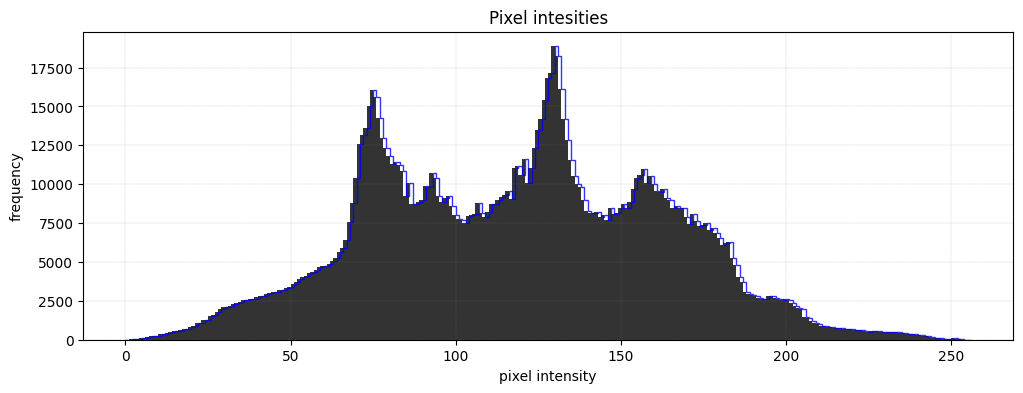

In [10]:
print('The blue line is the distribution of pixel intesities for default image')
Shower.show_dif_hist(img_grayscale, img_corrected)

### 2. Выполнить выравнивание гисторграммы методами OpenCV

In [11]:
img_corrected_cv = img_low_contrast.astype(np.uint8)
display(img_corrected_cv)

img_corrected_cv = cv2.equalizeHist(img_corrected_cv)
display(img_corrected_cv)

array([[32, 35, 36, ..., 27, 26, 31],
       [34, 36, 37, ..., 28, 27, 33],
       [35, 37, 38, ..., 29, 29, 34],
       ...,
       [52, 51, 51, ..., 48, 49, 54],
       [56, 54, 53, ..., 43, 44, 51],
       [59, 56, 55, ..., 38, 38, 47]], dtype=uint8)

array([[ 26,  36,  41, ...,  18,  16,  24],
       [ 31,  41,  46, ...,  19,  18,  29],
       [ 36,  46,  52, ...,  21,  21,  31],
       ...,
       [101,  98,  98, ...,  89,  92, 107],
       [113, 107, 104, ...,  72,  75,  98],
       [124, 113, 110, ...,  52,  52,  86]], dtype=uint8)

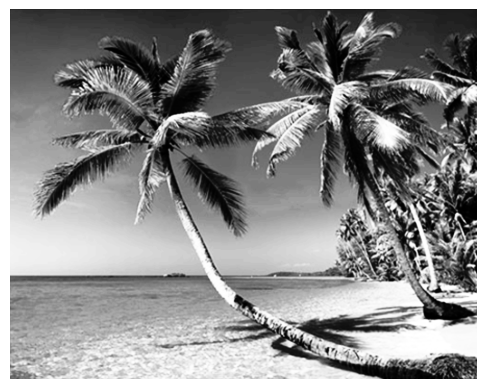

In [12]:
Shower.show_img(img_corrected_cv)

The blue line is the distribution of pixel intesities for default image


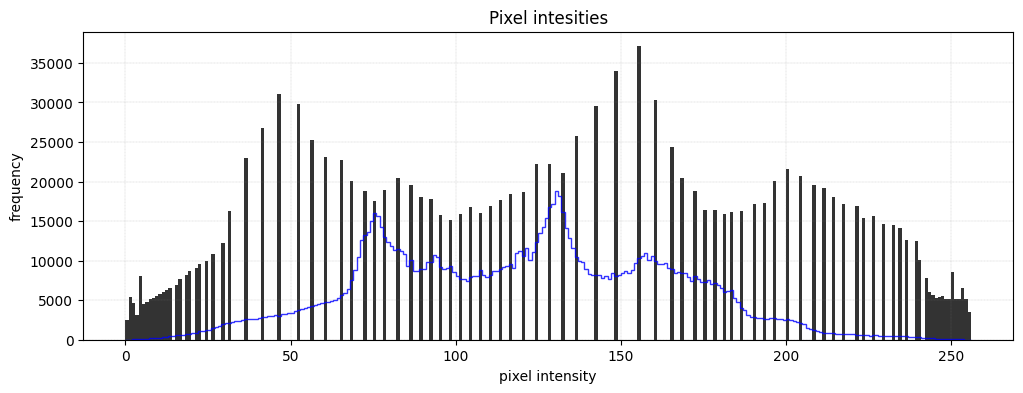

In [13]:
print('The blue line is the distribution of pixel intesities for default image')
Shower.show_dif_hist(img_grayscale, img_corrected_cv)

## Альтернативное задание

In [14]:
IMG_PATH = './materials/imgs/grayscale_entire_spectrum.jpg'

### Произвести линейную коррекцию контрастности изображения с учетом того, что может быть весь спект значений от 0 до 255

array([[49, 49, 49, ..., 47, 47, 47],
       [49, 49, 50, ..., 48, 48, 48],
       [50, 50, 50, ..., 49, 49, 48],
       ...,
       [35, 38, 40, ..., 66, 67, 67],
       [36, 37, 37, ..., 51, 52, 53],
       [35, 33, 29, ..., 44, 46, 48]], dtype=uint8)

Min pixel intesity: 0
Max pixel intesity: 255


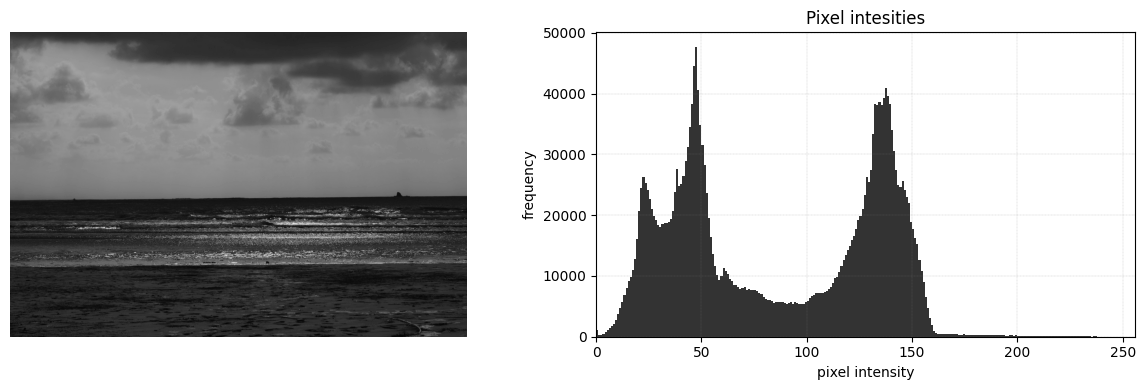

In [15]:
img_grayscale_entire_spectrum = cv2.imread(
    IMG_PATH,
    cv2.IMREAD_GRAYSCALE
)

display(img_grayscale_entire_spectrum)
print('Min pixel intesity:', img_grayscale_entire_spectrum.min())
print('Max pixel intesity:', img_grayscale_entire_spectrum.max())
Shower.show_img_and_exposure_hist(img_grayscale_entire_spectrum)

In [16]:
def get_centered_img(
    img_mtx: np.ndarray, 
    min_centering_percent: float=0.05,
    max_centering_precent: float=0.10
):
    '''
    The max_centering_precent more than min_centering_percent because usualy
    we have more frequency of pixels with less intensity on images. So, the
    dark pixels (with more intensity) not so frequency and there are many
    of differences counts of dark pixels.
    So, big max_centering_precent gives more contrast.
    '''

    x_min = img_mtx.min() + (min_centering_percent * 255)
    x_max = img_mtx.max() - (max_centering_precent * 255)

    img_corrected = deepcopy(img_mtx)

    img_corrected[img_corrected < x_min] = x_min
    img_corrected[img_corrected > x_max] = x_max
    return img_corrected

array([[49, 49, 49, ..., 47, 47, 47],
       [49, 49, 50, ..., 48, 48, 48],
       [50, 50, 50, ..., 49, 49, 48],
       ...,
       [35, 38, 40, ..., 66, 67, 67],
       [36, 37, 37, ..., 51, 52, 53],
       [35, 33, 29, ..., 44, 46, 48]], dtype=uint8)

Min pixel intesity: 12
Max pixel intesity: 229


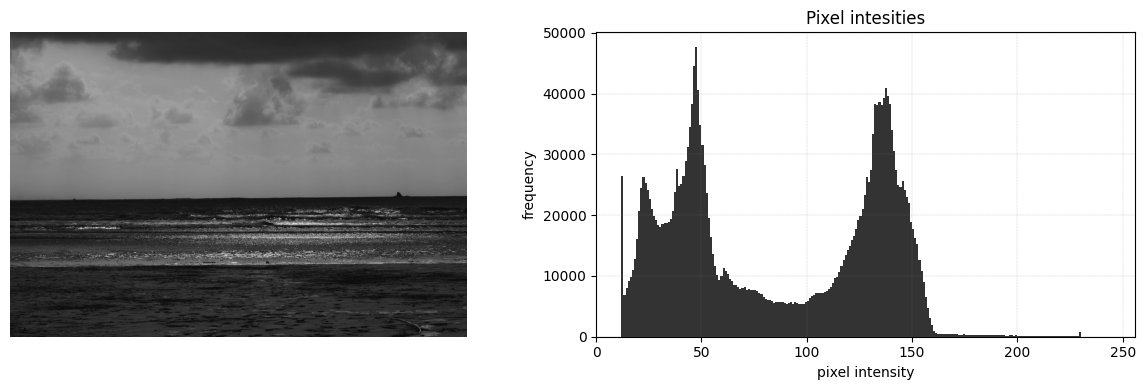

In [17]:
img_centered = get_centered_img(img_grayscale_entire_spectrum)
display(img_centered)
print('Min pixel intesity:', img_centered.min())
print('Max pixel intesity:', img_centered.max())

Shower.show_img_and_exposure_hist(img_centered)

array([[41.20087336, 41.20087336, 41.20087336, ..., 38.97379913,
        38.97379913, 38.97379913],
       [41.20087336, 41.20087336, 42.31441048, ..., 40.08733624,
        40.08733624, 40.08733624],
       [42.31441048, 42.31441048, 42.31441048, ..., 41.20087336,
        41.20087336, 40.08733624],
       ...,
       [25.61135371, 28.95196507, 31.1790393 , ..., 60.13100437,
        61.24454148, 61.24454148],
       [26.72489083, 27.83842795, 27.83842795, ..., 43.4279476 ,
        44.54148472, 45.65502183],
       [25.61135371, 23.38427948, 18.930131  , ..., 35.63318777,
        37.86026201, 40.08733624]])

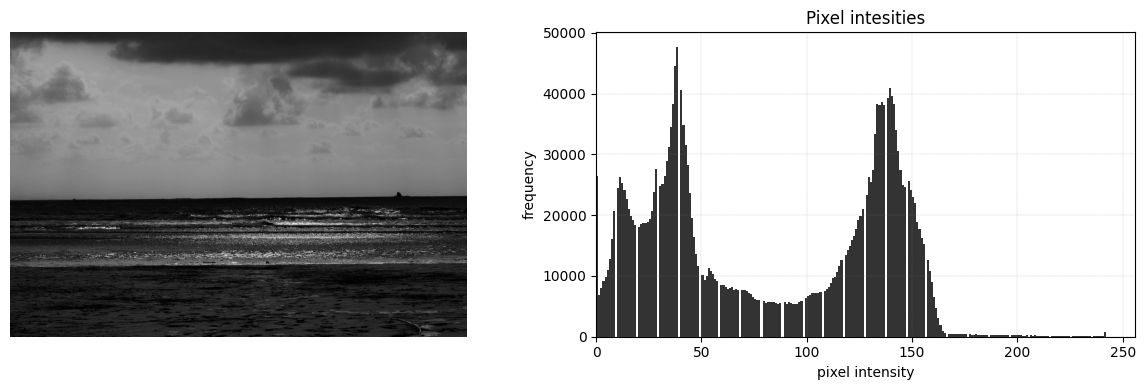

In [18]:
img_corrected_entire_spectrum = linear_contrast_correction(img_centered)
display(img_corrected_entire_spectrum)

Shower.show_img_and_exposure_hist(img_corrected_entire_spectrum)

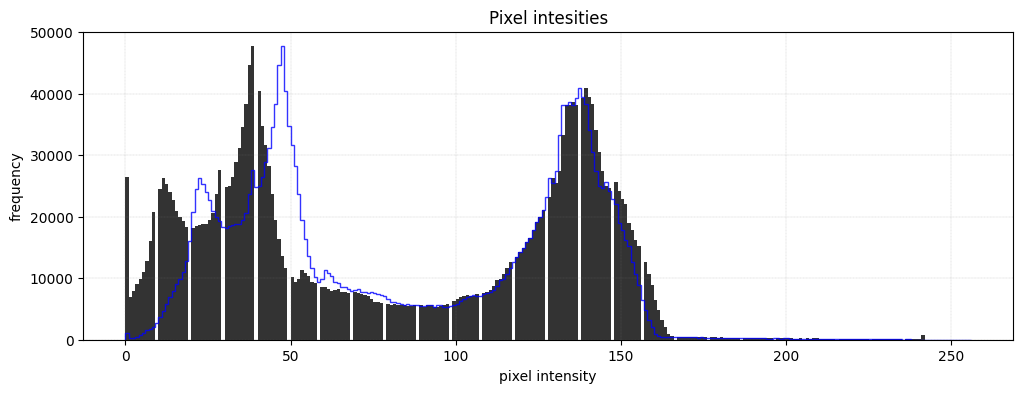

In [19]:
Shower.show_dif_hist(img_grayscale_entire_spectrum, img_corrected_entire_spectrum)